<a href="https://kaggle.com/kernels/welcome?src=https://github.com/mayait/ClaseAnalisisDatos/blob/main/python101/EstadisticaDescriptivaPython.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" width=120 /></a>

<a href="https://colab.research.google.com/github/mayait/ClaseAnalisisDatos/blob/main/python101/EstadisticaDescriptivaPython.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" width=120 /></a>

In [ ]:
#@title Nombre del estudiante
Estudiante = "Emill Logroño" #@param {type:"string"}
Código = "" #@param {type:"string"}

<img src="https://usfq.leanlabs.co/static/img/logo-bp.png" width="200"/>

# **Estadística Descriptiva**

# <center>    </center>


---



## Descripción
Conceptos asociados a la estadística descriptiva implementando Python

## Contenido

* Medidas de Tendencia Central
* Medidas de Dispersión
* Medidas de Posición
* Medidas de Forma
* Distribución Normal
* Covarianza y correlación

## Referencias importantes:
* [Seaborn Charts](https://seaborn.pydata.org/tutorial/distributions.html)
* <a href='https://rdrr.io/cran/ISLR/man/Credit.html'>
  Dataset </a>
* https://storage.googleapis.com/datasets-academy/Credit.csv



## 1. Dataset de Trabajo

**Credit:** conjunto de datos simulados que contiene información sobre diez mil clientes de una entidad financiera

<a href='https://rdrr.io/cran/ISLR/man/Credit.html'>
  Documentación de las variables </a>

**Diccionario de datos**
* ID: Código de identificación del cliente
* Income: Ingresos del cliente en $10,000's
* Limit: Límite de crédito
* Rating: Puntaje crediticio
* Cards: Número de tarjetas de crédito
* Age: Edad en años
* Education: Número de años de educación
* Gender: Masculino (Male) o Femenino (Female)
* Student: Si el cliente es estudiantes (Yes) o no lo es (No)
* Married: Si el cliente está casado (Yes) o no está (No)
* Ethnicity: Africano (African), Americano (American), Asiático (Asian) y Caucásico (Caucasian)
* Balance: Promedio del saldo de la tarjeta de crédito en dólares


In [ ]:
import sys
import numpy as np
import pandas as pd
# Librería para medidas de posición y forma
import scipy
import scipy.stats as stats
# Librerías para visualización
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

## Descargando el dataset
https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/python101/data/Credit.csv

In [ ]:
!wget https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/python101/data/Credit.csv

## Importar dataset
pd.read_csv() permite importar un archivo de texto a Pandas

In [ ]:
Credit = pd.read_csv('https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/python101/data/Credit.csv')

In [ ]:
# Dimensiones del dataset
print(Credit.shape)

In [ ]:
Credit.sample(4) # Me muestro los datos desordenados

In [ ]:
# Muestra los 20 primeros
Credit.head(5)

In [ ]:
Credit["Income"]

In [ ]:
Credit.tail()

In [ ]:
Credit.dtypes

In [ ]:
Credit.columns

In [30]:
#Cuantos son hombres y son mujeres
Credit[Credit['Gender'] != 'Female'].value_counts()


ID   Income  Limit  Rating  Cards  Age  Education  Gender  Student  Married  Ethnicity         Balance
1    14.891  3606   283     2      34   11          Male   No       Yes      Caucasian         333        1
218  12.456  5395   392     3      65   14          Male   No       Yes      Caucasian         955        1
278  41.532  5000   353     2      50   12          Male   No       Yes      Caucasian         531        1
285  14.711  2047   167     2      67   6           Male   No       Yes      Caucasian         0          1
288  60.449  3098   272     4      69   8           Male   No       Yes      Caucasian         0          1
                                                                                                         ..
155  55.056  3155   235     2      31   16          Male   No       Yes      African American  0          1
160  53.319  3000   235     3      53   13          Male   No       No       Asian             0          1
162  31.353  1705   160     3    

In [ ]:
Credit[Credit['Gender'] == 'Female'].value_counts()

In [34]:
Credit[0:3]  # Iloc es para seleccionar por posición # loc es para seleccionar por etiqueta o columna

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


## 2. Medidas de Tendencia Central

Empezaremos visualizando la distribución de los ingresos por medio de un histograma.

**Ejercicio:** Identificar las características de la distribución.

c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


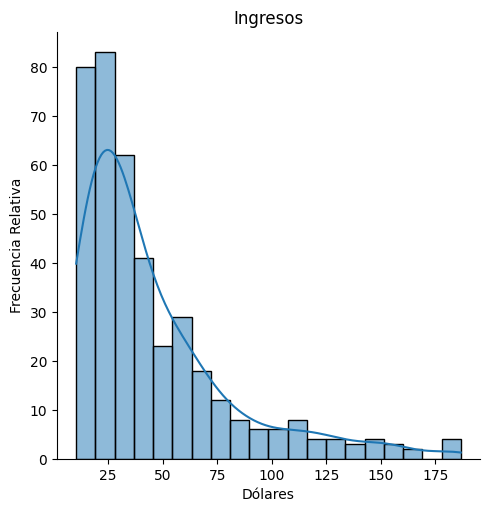

In [35]:
# disploy es para mostrar la gráfica con histograma
sns.displot(Credit, x='Income', bins=20, kde=True) # kde es para que me muestre la curva de densidad, el bins es para que me muestre la cantidad de barras
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Relativa")
plt.show()


In [ ]:
sns.displot(Credit, x='Income', hue='Student', kde=True) #hue crea un histograma por cada una de las categorías de manufactorer_name
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Relativa")
plt.show()


In [ ]:
Credit.groupby('Gender').count()


In [38]:
# Medidas de tendencia central
media_income    = Credit["Income"].mean()
mediana_income  = Credit["Income"].median()
moda_income     = Credit["Income"].mode()

print('Media: ', media_income, '\nMediana: ', mediana_income, '\nModa: ', moda_income[0]) # Sie

Media:  45.218885 
Mediana:  33.1155 
Moda:  23.793


In [39]:
Credit["Income"].mode()

0    23.793
Name: Income, dtype: float64

**¿Cuál de las medidas de tendencia central resumen correctamente a los ingresos?**

c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


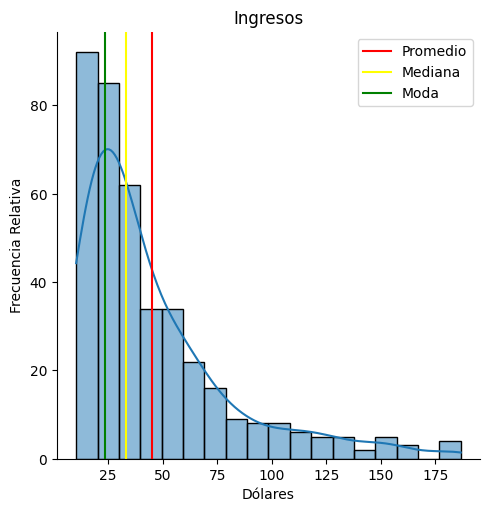

In [44]:
sns.displot(Credit,x='Income', bins='fd', kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Relativa")
plt.axvline(media_income, color='red', label='Promedio')
plt.axvline(mediana_income, color='yellow', label='Mediana')
plt.axvline(moda_income[0], color='green', label='Moda')
plt.legend()
plt.show()

# 🌶 1
**Ejercicio 1:** Obtener el promedio, mediana y moda de la columna `Limit` del  DataFrame `Credit`


```
Respuesta:
Promedio: 4735.6
Mediana: 4622.5
Moda: 855
```



In [ ]:
# Obtener el promedio, mediana y moda de la columna `Limit` del  DataFrame `Credit`
🌶️🌶️🌶️🌶️🌶️🌶️🌶️
🌶️🌶️🌶️🌶️🌶️🌶️🌶️
🌶️🌶️🌶️🌶️🌶️🌶️🌶️
print('Media: ', 🌶️🌶️🌶️🌶️🌶️🌶️🌶️, '\nMediana: ', 🌶️🌶️🌶️🌶️🌶️🌶️🌶️, '\nModa: ', 🌶️🌶️🌶️🌶️🌶️🌶️🌶️[0])



## 3. Medidas de Dispersión

### Rango

In [ ]:
Credit["Income"].min()

In [ ]:
Credit["Income"].max()

In [ ]:
print("El ingreso mínimo es de:", Credit["Income"].min())
print("El ingreso máximo es de:", Credit["Income"].max())
print("El rango es igual a:", Credit["Income"].max() - Credit["Income"].min())

### Varianza y Desviación Estándar
* El argumento ```ddof``` hace referencia al denominador: ```N-ddof```
* ```ddof=0``` si trabajamos con la población
* ```ddof=1``` si trabajamos con la muestra

In [ ]:
print("La varianza en la población es igual a:", Credit["Income"].var(ddof=0))
print("La desviación estandar en la población es igual a:", Credit["Income"].std(ddof=0))

In [ ]:
print("La varianza en la muestra es igual a:", Credit["Income"].var())
print("La desviación estandar en la muestra es igual a:", Credit["Income"].std())

# 🌶 2

---


**Ejercicio 2:** Obtener el rango, la varianza muestral y la desviación estándar muestral de la columna `Balance` del  DataFrame `Credit`


```
Respuesta:
Rango: 1999
Varianza muestral: 211378.22533834586
Desv. estándar muestral: 459.75887738938314
```



In [ ]:
# Obtener el rango, la varianza muestral y la desviación estándar muestral de la columna `Balance` del  DataFrame `Credit`

🌶️🌶️🌶️🌶️🌶️🌶️🌶️🌶️🌶️🌶️🌶️🌶️🌶️🌶️



Jointplot muestra un scatterplot y la distribución de los datos.

Documentación de jointplot: http://seaborn.pydata.org/generated/seaborn.jointplot.html

In [ ]:
sns.jointplot(data=Credit, x='Income', y='Rating', hue='Ethnicity')


## 4. Medidas de Posición
El método ```describe()``` muestra de forma predeterminada los cuartiles sin embargo, podemos requerir otras medidas de posición de acuerdo a lo que se necesite.

In [ ]:
Credit["Income"].describe()

In [ ]:
# Percentil 90
Credit["Income"].quantile(0.90)

### Rango Intercuartil (IQR)
Medida de dispersión a ser utilizada cuando se emplea la mediana como medida de tendencia central.
Se define como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), es decir: $$IRQ = Q3 - Q1$$.

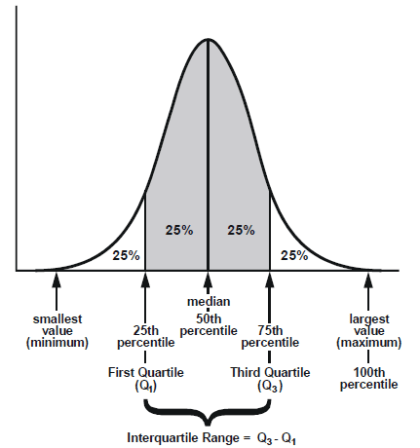

Source:makemeanalyst.com


In [ ]:
stats.iqr(Credit["Income"])

In [ ]:
Credit["Income"].quantile(0.75) - Credit["Income"].quantile(0.25)

## BOX-PLOT :

Un diagrama de caja es una forma muy útil y estandarizada de mostrar la distribución de datos basada en un resumen de cinco números (mínimo, primer cuartil, segundo cuartil (mediana), tercer cuartil, máximo).

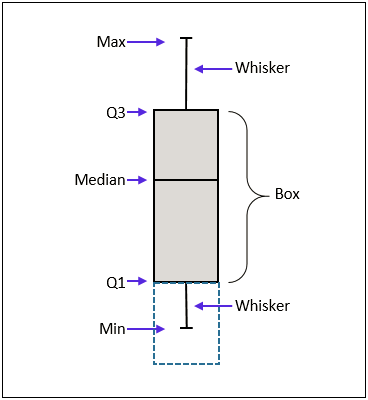

Source: biostats.w.uib.no


In [ ]:
sns.boxplot(x=Credit["Income"],color = "pink")
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.show()

In [ ]:
sns.boxplot(x=Credit["Income"], color="pink")
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")

#Pongamosle las lineas
plt.axvline(🌶️🌶️🌶️🌶️🌶️🌶️🌶️, color='green', label='Q1')
plt.axvline(🌶️🌶️🌶️🌶️🌶️🌶️🌶️, color='blue', label='Q2/Mediana')
plt.axvline(🌶️🌶️🌶️🌶️🌶️🌶️🌶️, color='red', label='Q3')
plt.legend()
plt.show()

In [ ]:
sns.boxplot(x=Credit["Income"], y=Credit["Gender"])
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.show()

In [ ]:
sns.boxplot(x=Credit["Income"], y=Credit["Ethnicity"])
plt.title("Boxplot de los Ingresos por Etnia")
plt.xlabel("Dólares")
plt.show()

### Valores atípicos/extremos/outliers
Se definen como observaciones extremas a aquellas que se encuentran fuera del rango $$[Q_1-(1.5 \times IQR) ; Q_3 +(1.5 \times IQR)]$$

In [ ]:
IQR  = stats.iqr(Credit["Income"])
whis = 1.5
cons = IQR * whis

#Cuartiles
Q1   = Credit["Income"].quantile(0.25)
Q3   = Credit["Income"].quantile(0.75)

print("El límite inferior para valores extremos es:", (Q1-cons))
print("El límite superior para valores extremos es:", (Q3+cons))

In [ ]:
sns.boxplot(x=Credit["Income"], color="pink", whis=1.5)
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.axvline(Q3+cons, color='blue', label='Lim. Superior')
plt.legend()
plt.show()

In [ ]:
sns.histplot(Credit["Income"], color ="darkblue", kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Relativa")
plt.axvline(🌶️🌶️🌶️🌶️🌶️🌶️🌶️, color='blue', label='Lim. Superior')
plt.legend()
plt.show()

# 🌶 3
**Ejercicio 3:** Encuentre los quintiles y el rango intercuartil de la columna `Education` del  DataFrame `Credit`


```
Respuesta:
Quintiles:
0.2    11.0
0.4    13.0
0.6    15.0
0.8    16.0
Name: Education, dtype: float64

IQR Educación: 5.0
```



In [ ]:
# Encuentre los quintiles y el rango intercuartil de la columna `Education` del  DataFrame `Credit`



## 5. Medidas de Forma
Interprete el coeficiente de asimetría y la curtosis

[Asimentria wikipedia](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica)

[Curtosis wikipedia](https://es.wikipedia.org/wiki/Curtosis)

La asimetría de los datos representa la medida en que los valores de los datos no son simétricos con respecto a la media. Una forma de medir la asimetría es comparando la media y la mediana de la distribución.

*   Mean > Median: Distribución positiva o sesgada a la derecha
*   Mean = Median: Zero skewness o distribución simetrica
*   Mean < Median: Distribución Negativa o sesgada a la izquierda

<img src="https://miro.medium.com/max/1028/1*h5hWyG0USsED8TOOc5D4fA.png">

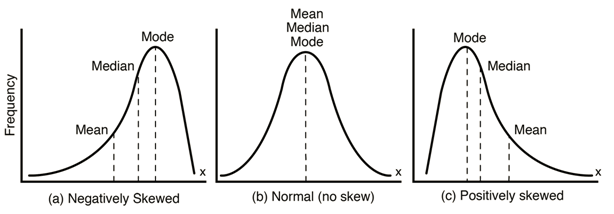

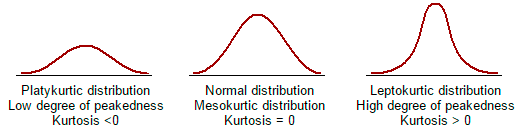

Source : tekmarathon.com



In [ ]:
print("El coeficiente de asimetría es igual a:", Credit["Income"].skew())
print("La curtosis es igual a:", Credit["Income"].kurtosis())

In [ ]:
sns.distplot(Credit["Income"], color="darkred", kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Relativa")
plt.axvline(media, color='red', label='Promedio')
plt.axvline(mediana, color='yellow', label='Mediana')
plt.axvline(moda[0], color='green', label='Moda')
plt.legend()
plt.show()

# 🌶 4

Ejercicio 4: Obtenga el coeficiente de asimetría y la curtosis de la columna Rating del DataFrame Credit


```
Respuesta:
Coeficiente de asimetría: 0.8653935227370102
Curtosis: 1.0609469816702823
```



In [ ]:
# Tu magia aquí

## 6. Covarianza y correlación

Analizar las relaciones **lineales** entre dos variables cuantitativas por medio de la covarianza y correlación.

- **Covarianza**: Nos da el signo de la relación entre dos variables, pero no podemos determinar la intensidad en la relación entre las mismas
- **Coeficiente de correlación de Person**: Nos permite entender la relación entre las variables tanto su dirección (signo) e intensidad (valor). Se encuentra entre los valores de -1 y 1

Es importante comprender que la correlación no representa causalidad, analicemos algunos ejemplos: [Correlación Espuria](https://www.tylervigen.com/spurious-correlations)

In [ ]:
# Matriz de varianzas y covarianzas
Credit.cov().round(decimals=2)

A diferencia de la covarianza, el coeficiente de correlación es independiente de la escala y puede tomar un valor entre -1 y +1. Un valor más cercano a -1 indica una correlación negativa entre las variables. Por ejemplo, la correlación entre Rango y Valor es igual a -0,48. Esto indica que a medida que aumenta el Valor, disminuye el Rango (que sería mayor ya que el Rango 1 se considera el más alto).

In [ ]:
# Matriz de correlaciones
Credit.corr().round(decimals=2)

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(Credit.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag_r',);